# Simple AC circuit analysis ( i guess)



#### UANL- FIME

#### Made by LAHC (give me credits or buy me a coffee pls......nah just kiddin)

### The whole purpose of this notebook is to be taken as a reference guide if you are new to Octave (matlab) and Jupyter notebooks.

## Initialize source data

In [1]:
f=50;   %Operating frequency
w=2*pi*f;   %Angular frequency
t= linspace(0,1,10000); %Time reference
A=312;    %Voltage amplitude 
vf= A*cos(w*t);  %Fundamental instantaneous voltage component
vd= (A/4)*cos(3*w*t)+(A/8)*cos(5*w*t);  %Distortion instantaneous voltage component
vs= vf+vd;  % Instantaneous voltage component

## Instantaneous voltage components

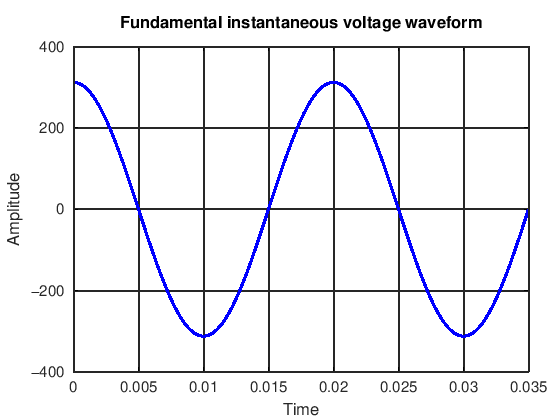

In [2]:
%Fundamental voltage component
plot(t,vf,'b','linewidth',8)
xlim([0 0.035])
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Fundamental instantaneous voltage waveform')
xlabel('Time')
ylabel('Amplitude')

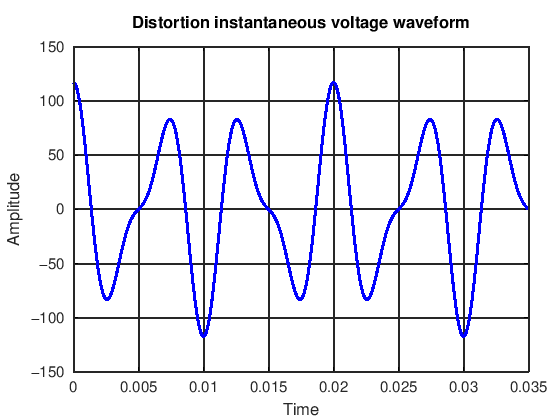

In [3]:
%Distortion voltage component
plot(t,vd,'b','linewidth',8)
xlim([0 0.035])
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Distortion instantaneous voltage waveform')
xlabel('Time')
ylabel('Amplitude')

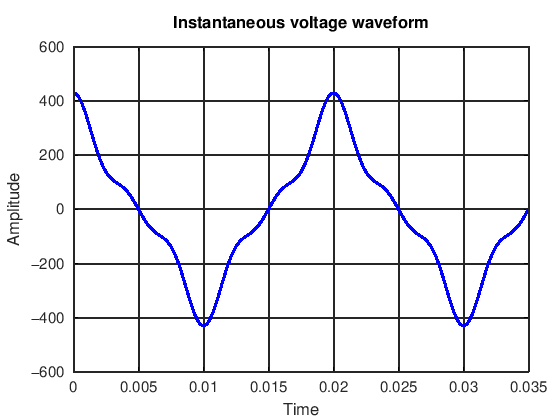

In [4]:
% Instantaneous voltage waveform
plot(t,vs,'b','linewidth',8)
xlim([0 0.035])
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Instantaneous voltage waveform')
xlabel('Time')
ylabel('Amplitude')

## Voltage root-mean square calculations

In [5]:
% Fundamental RMS calculation
vf_rms=frms(vf)

vf_rms =  220.63


In [6]:
% Distortion RMS calculation
vd_rms=frms(vd)

vd_rms =  61.672


In [7]:
% Total RMS calculation
vs_rms= frms(vs)

vs_rms =  229.10


## Initialize load data

In [8]:
% Source series impedance
rs=0.012; %Source wire series AC resistance 
ls=0.03;  %Source wire series inductance

In [9]:
%Load 1 data - inductive load
l1=0.55; %Load 1 inductance

In [10]:
%Load 2 data - heavily inductive load
r2=10; %Resistive component
l2=0.87; %Load 2 inductance

In [11]:
%Load 3 data - heavily capacitive load
r3=10; %Resistive component
c3=0.000001; %Load 3 capacitance

## Equivalent load impedance @ 50Hz

In [12]:
x_ls= w*ls; % Reactance value for wire series inductance
z_ls= complex(rs,x_ls) % Wire series impedance

z_ls =  0.012000 + 9.424778i


In [13]:
x_l1= w*l1; % Reactance value for load 1
z_l1= complex(0,x_l1) % Impedance value for load 1

z_l1 =    0.00000 + 172.78760i


In [14]:
x_l2= w*l2; % Reactance value for load 2
z_l2= complex(r2,x_l2) % Impedance value for load 2

z_l2 =   10.000 + 273.319i


In [15]:
x_c3= 1/(w*c3); % Reactance value for load 3
z_l3= complex(r3,-x_c3) % Impedance value for load 3

z_l3 =    10.000 - 3183.099i


In [16]:
inv_zp= inv(z_l1)+inv(z_l2)+inv(z_l3); % Equivalent parallel impedance
zp= inv(inv_zp)

zp =    1.6163 + 109.5395i


In [17]:
% Equivalent impedance
zt= zp+z_ls
mag_zt= abs(zt)
theta_zt= rad2deg(angle(zt))

zt =    1.6283 + 118.9643i
mag_zt =  118.98
theta_zt =  89.216


## RMS Current calculations @ fundamental voltage component

In [18]:
%Total RMS current draw
is= vf_rms/zt
mag_is= abs(is) %Current magnitude in amps
angle_is= rad2deg(angle(is)) %Phase angle in degrees

is =  0.025379 - 1.854229i
mag_is =  1.8544
angle_is = -89.216


In [19]:
isc= vf_rms/abs(z_ls) %Short circuit current in amps

isc =  23.409


In [20]:
i_l1= (is*zp)/z_l1
mag_i_l1= abs(i_l1) %Current magnitude in amps
angle_i_l1= rad2deg(angle(i_l1))  %Phase angle in degrees

i_l1 = -0.0012555 - 1.1757345i
mag_i_l1 =  1.1757
angle_i_l1 = -90.061


In [21]:
i_l2= (is*zp)/z_l2
mag_i_l2= abs(i_l2) %Current magnitude in amps
angle_i_l2= rad2deg(angle(i_l2))  %Phase angle in degrees

i_l2 =  0.026366 - 0.742316i
mag_i_l2 =  0.74278
angle_i_l2 = -87.966


In [22]:
i_l3= (is*zp)/z_l3
mag_i_l3= abs(i_l3) %Current magnitude in amps
angle_i_l3= rad2deg(angle(i_l3)) %Phase angle in degrees

i_l3 =  0.00026865 + 0.06382135i
mag_i_l3 =  0.063822
angle_i_l3 =  89.759


## Apparent, average and reactive power calculations  

In [23]:
%Total complex power
S_complex= vf_rms*conj(is) % Apparent power in volt-amperes
P_avg= real(S_complex) % Average power in watts
Q_t= imag(S_complex)   % Reactive power in volt-amperes reactive 
pf= cosd(theta_zt)     % Displacement power factor

S_complex =    5.5993 + 409.0955i
P_avg =  5.5993
Q_t =  409.10
pf =  0.013686


## Power plots

In [24]:
%Average power component
pavg= (vf_rms*mag_is)*cosd(theta_zt)
p_c= pavg-pavg*cos(2*w*t);

pavg =  5.5993


In [25]:
%Oscillatory power component
q_power= (vf_rms*mag_is)*sind(theta_zt)
o_c= q_power*sin(2*w*t);

q_power =  409.10


In [26]:
%Instantaneous power
p_inst= p_c-o_c;

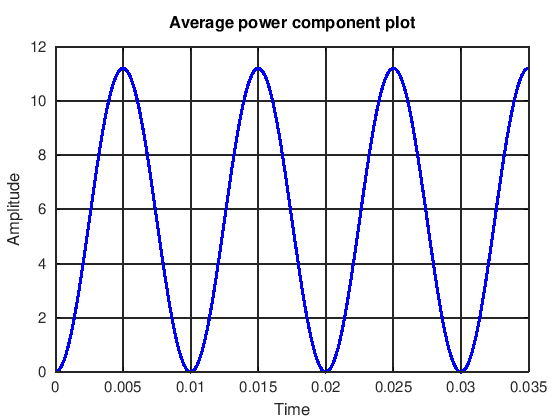

In [27]:
%Average power component plot
plot(t,p_c,'b','linewidth',8)
xlim([0 0.035])
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Average power component plot')
xlabel('Time')
ylabel('Amplitude')

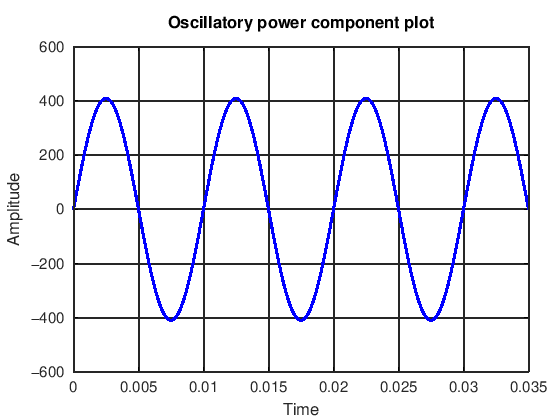

In [28]:
%Oscillatory power component plot
plot(t,o_c,'b','linewidth',8)
xlim([0 0.035])
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Oscillatory power component plot')
xlabel('Time')
ylabel('Amplitude')

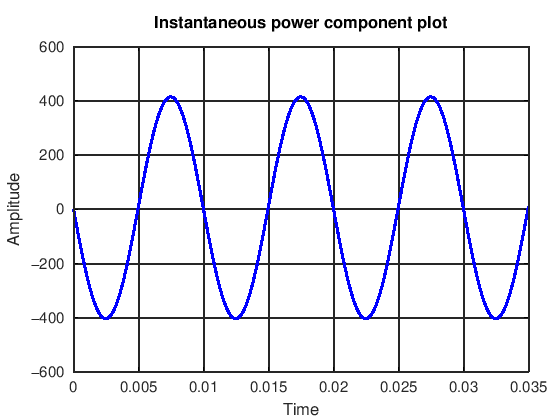

In [29]:
%Instantaneous power component plot
plot(t,p_inst,'b','linewidth',8)
xlim([0 0.035])
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Instantaneous power component plot')
xlabel('Time')
ylabel('Amplitude')

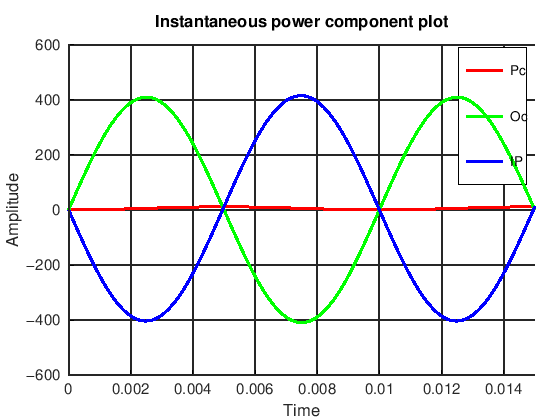

In [32]:
%Instantaneous power component plot
hold on
plot(t,p_c,'r','linewidth',8)
plot(t,o_c,'g','linewidth',8)
plot(t,p_inst,'b','linewidth',8)
xlim([0 0.015])
grid on
set(gca, "linewidth", 4, "fontsize", 15)
title('Instantaneous power component plot')
xlabel('Time')
ylabel('Amplitude')
legend('Pc','Oc','IP')